# Problem Statement

Is the account active?
Deutsche Bank has been continuously trying to identify whether the bank account has been active or not on the basis of various factors like education, occupation, income, etc.
Currently, the Deutsche Bank has data of around 15000 bank accounts which they think can put to good use. They have provided a label that indicates the bank account is active or not.
With the current trend of Machine Learning, the officials think this data can be put to great use.
Your task as a machine learning engineer is to design the model with the available data provided to you. Making your way through the data, formulate the model which can provide accurate results to the bank!



By reading the problem statement one can make out this is a classification problem.
The flow of the solution is : 
    1. Preprocess the data into machine readable form. 
    2. Then convert the dataset into one hot vector. 
    3. Fit the training set to various models.
    4. Predict using test set.

In [310]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model




from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission_edx = pd.read_csv("sample_submission.csv")
print("Length of the dataset:" + str(len(train)))
test.head()
# Any results you write to the current directory are saved as output.

Length of the dataset:14000


,id,Gender,Country,Age,Income,Marital-Status,workclass,credit-score,Learning,Tenure,Balance,Products,Education,Occupation
0,14027,Female,Australia,38.0,180000.0,Never-married,Private,151031.0,4.0,4.0,107011.0,NaN,HS-Grad,Prof-specialty
1,14028,Female,France,22.0,50000.0,Separated,Private,50089.0,4.0,4.0,101798.0,3.0,HS-Grad,Prof-specialty
2,14029,Male,Australia,33.0,300000.0,Separated,Private,283552.0,4.0,4.0,110000.0,3.0,HS-Grad,Prof-specialty
3,14030,Male,Australia,32.0,200000.0,Never-married,Self-emp-inc,110419.0,NaN,6.0,105400.0,5.0,Masters,Prof-specialty
4,14031,Female,Australia,26.0,50000.0,Separated,Private,26023.0,6.0,4.0,101453.0,5.0,Masters,Prof-specialty


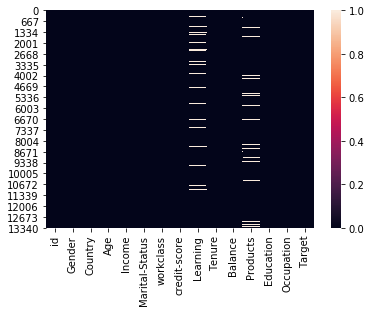

In [311]:
sns.heatmap(train.isnull())

In [312]:
train.isnull().sum()

id                   0
Gender               0
Country              0
Age                  0
Income               0
Marital-Status       0
workclass            0
credit-score         0
Learning          1407
Tenure               0
Balance              0
Products          1392
Education            0
Occupation           0
Target               0
dtype: int64

In [313]:
train.dtypes

id                  int64
Gender             object
Country            object
Age               float64
Income            float64
Marital-Status     object
workclass          object
credit-score      float64
Learning          float64
Tenure            float64
Balance           float64
Products          float64
Education          object
Occupation         object
Target              int64
dtype: object

In [314]:
df_bin = pd.DataFrame()#discrete dataframe

**We have to map between id and target**

**Now we are going to look at each feature or data field**

In [315]:
train.head()

,id,Gender,Country,Age,Income,Marital-Status,workclass,credit-score,Learning,Tenure,Balance,Products,Education,Occupation,Target
0,0,Female,Australia,53.0,20000.0,Separated,Local-gov,18396.0,8.0,7.0,100000.0,6.0,Masters,Adm-clerical,0
1,1,Female,Canada,28.0,100000.0,Separated,Private,10886.0,4.0,4.0,101300.0,5.0,HS-Grad,Prof-specialty,0
2,2,Female,Australia,35.0,200000.0,Never-married,Private,71561.0,4.0,4.0,104000.0,3.0,HS-Grad,Prof-specialty,0
3,3,Female,Canada,43.0,50000.0,Never-married,Private,49390.0,4.0,4.0,102449.0,3.0,Masters,Prof-specialty,0
4,4,Female,Russia,29.0,100000.0,Never-married,Private,99302.0,4.0,4.0,105712.0,3.0,HS-Grad,Prof-specialty,0


**GENDER**

Female    8474
Male      5526
Name: Gender, dtype: int64


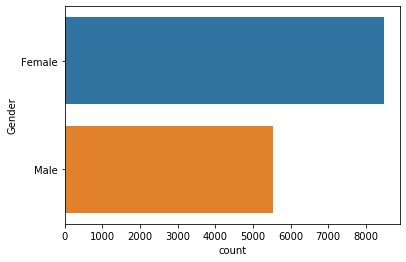

In [316]:
print(train['Gender'].value_counts())
sns.countplot(y='Gender', data = train)

**Female = 0 and Male = 1**

In [317]:
df_bin['Gender'] = train['Gender'] 
df_bin['Gender'] = df_bin['Gender'].replace(to_replace = ['Female', 'Male'], value = [0, 1])

df_bin.head(10)

,Gender
0,0
1,0
2,0
3,0
4,0
5,1
6,0
7,0
8,0
9,0


In [318]:
train.head()

,id,Gender,Country,Age,Income,Marital-Status,workclass,credit-score,Learning,Tenure,Balance,Products,Education,Occupation,Target
0,0,Female,Australia,53.0,20000.0,Separated,Local-gov,18396.0,8.0,7.0,100000.0,6.0,Masters,Adm-clerical,0
1,1,Female,Canada,28.0,100000.0,Separated,Private,10886.0,4.0,4.0,101300.0,5.0,HS-Grad,Prof-specialty,0
2,2,Female,Australia,35.0,200000.0,Never-married,Private,71561.0,4.0,4.0,104000.0,3.0,HS-Grad,Prof-specialty,0
3,3,Female,Canada,43.0,50000.0,Never-married,Private,49390.0,4.0,4.0,102449.0,3.0,Masters,Prof-specialty,0
4,4,Female,Russia,29.0,100000.0,Never-married,Private,99302.0,4.0,4.0,105712.0,3.0,HS-Grad,Prof-specialty,0


**COUNTRY**

Australia    6581
Canada       4924
France       2288
Spain         125
Germany        49
Russia         27
US              6
Name: Country, dtype: int64


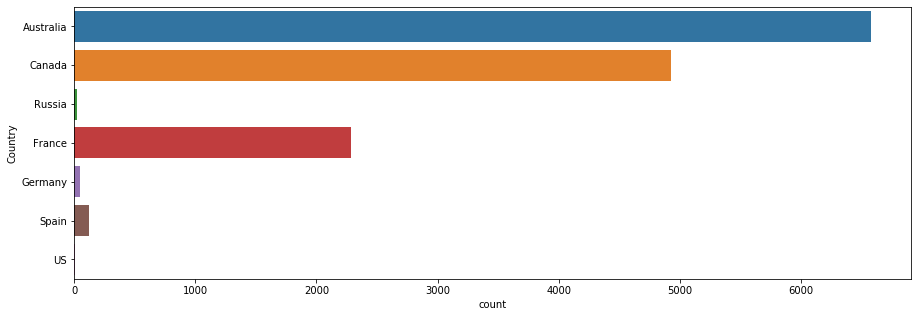

In [319]:
print(train['Country'].value_counts())
pltfigure = plt.figure(figsize = (15,5))
sns.countplot(y = 'Country', data=train)

In [320]:
df_bin['Country'] = train['Country']
#df_bin.isnull().sum()
df_bin['Country'] = df_bin['Country'].replace(to_replace = ['Australia', 'Canada', 'France', 'Spain', 'Germany', 'Russia', 'US'], value = [0, 1, 2, 3, 4, 5, 6])
df_bin.head()

,Gender,Country
0,0,0
1,0,1
2,0,0
3,0,1
4,0,5


In [321]:
train.head()

,id,Gender,Country,Age,Income,Marital-Status,workclass,credit-score,Learning,Tenure,Balance,Products,Education,Occupation,Target
0,0,Female,Australia,53.0,20000.0,Separated,Local-gov,18396.0,8.0,7.0,100000.0,6.0,Masters,Adm-clerical,0
1,1,Female,Canada,28.0,100000.0,Separated,Private,10886.0,4.0,4.0,101300.0,5.0,HS-Grad,Prof-specialty,0
2,2,Female,Australia,35.0,200000.0,Never-married,Private,71561.0,4.0,4.0,104000.0,3.0,HS-Grad,Prof-specialty,0
3,3,Female,Canada,43.0,50000.0,Never-married,Private,49390.0,4.0,4.0,102449.0,3.0,Masters,Prof-specialty,0
4,4,Female,Russia,29.0,100000.0,Never-married,Private,99302.0,4.0,4.0,105712.0,3.0,HS-Grad,Prof-specialty,0


**AGE**

In [322]:
df_bin['Age'] = train['Age']
for i in range(len(train)):
        if df_bin.loc[i, 'Age']> 20 and df_bin.loc[i, 'Age']<= 30:
            df_bin.loc[i, 'Age'] = 0
        elif df_bin.loc[i, 'Age']> 30 and df_bin.loc[i, 'Age']<= 40:
            df_bin.loc[i, 'Age'] = 1        
        elif df_bin.loc[i, 'Age']> 40 and df_bin.loc[i, 'Age']<= 50:
            df_bin.loc[i, 'Age'] = 2
        elif df_bin.loc[i, 'Age']> 50 and df_bin.loc[i, 'Age']<= 60:
            df_bin.loc[i, 'Age'] = 3
        elif df_bin.loc[i, 'Age']> 60 and df_bin.loc[i, 'Age']<= 70:
            df_bin.loc[i, 'Age'] = 4
        elif df_bin.loc[i, 'Age']> 70 and df_bin.loc[i, 'Age']<= 80:
            df_bin.loc[i, 'Age'] = 5

#train.head()
df_bin.head()


,Gender,Country,Age
0,0,0,3.0
1,0,1,0.0
2,0,0,1.0
3,0,1,2.0
4,0,5,0.0


(20.946, 30.0]    5133
(30.0, 39.0]      4531
(39.0, 48.0]      2890
(48.0, 57.0]      1197
(57.0, 66.0]       224
(66.0, 75.0]        25

In [323]:
df_bin.Age.value_counts()

0.0    5133
1.0    4969
2.0    2854
3.0     922
4.0     116
5.0       6
Name: Age, dtype: int64

In [324]:
train.head()

,id,Gender,Country,Age,Income,Marital-Status,workclass,credit-score,Learning,Tenure,Balance,Products,Education,Occupation,Target
0,0,Female,Australia,53.0,20000.0,Separated,Local-gov,18396.0,8.0,7.0,100000.0,6.0,Masters,Adm-clerical,0
1,1,Female,Canada,28.0,100000.0,Separated,Private,10886.0,4.0,4.0,101300.0,5.0,HS-Grad,Prof-specialty,0
2,2,Female,Australia,35.0,200000.0,Never-married,Private,71561.0,4.0,4.0,104000.0,3.0,HS-Grad,Prof-specialty,0
3,3,Female,Canada,43.0,50000.0,Never-married,Private,49390.0,4.0,4.0,102449.0,3.0,Masters,Prof-specialty,0
4,4,Female,Russia,29.0,100000.0,Never-married,Private,99302.0,4.0,4.0,105712.0,3.0,HS-Grad,Prof-specialty,0


**INCOME**

In [325]:
print(train.Income.value_counts())
train.Income.value_counts().sum()

50000.0     1556
20000.0      935
30000.0      743
80000.0      735
200000.0     710
            ... 
16000.0        1
800000.0       1
730000.0       1
660000.0       1
327680.0       1
Name: Income, Length: 77, dtype: int64


14000

In [326]:
for i in range(len(train)):
        if train.loc[i, 'Income']> 9010 and train.loc[i, 'Income']<= 109000:
            train.loc[i, 'Income'] = 0
        elif train.loc[i, 'Income']> 109000 and train.loc[i, 'Income']<= 208000:
            train.loc[i, 'Income'] = 1        
        elif train.loc[i, 'Income']> 208000 and train.loc[i, 'Income']<= 307000:
            train.loc[i, 'Income'] = 2
        elif train.loc[i, 'Income']> 307000 and train.loc[i, 'Income']<= 406000:
            train.loc[i, 'Income'] = 3
        elif train.loc[i, 'Income']> 406000 and train.loc[i, 'Income']<= 505000:
            train.loc[i, 'Income'] = 4
        elif train.loc[i, 'Income']> 505000 and train.loc[i, 'Income']<= 604000:
            train.loc[i, 'Income'] = 5
        elif train.loc[i, 'Income']> 604000 and train.loc[i, 'Income']<= 703000:
            train.loc[i, 'Income'] = 6        
        elif train.loc[i, 'Income']> 703000 and train.loc[i, 'Income']<= 802000:
            train.loc[i, 'Income'] = 7
        elif train.loc[i, 'Income']> 802000 and train.loc[i, 'Income']<= 1000000:
            train.loc[i, 'Income'] = 8
        elif train.loc[i, 'Income']> 1000000 and train.loc[i, 'Income']<= 901000:
            train.loc[i, 'Income'] = 9

df_bin['Income'] = train['Income'] 
df_bin.head()

,Gender,Country,Age,Income
0,0,0,3.0,0.0
1,0,1,0.0,0.0
2,0,0,1.0,1.0
3,0,1,2.0,0.0
4,0,5,0.0,0.0


> (9010.0, 109000.0]       5814
(109000.0, 208000.0]     3649
(208000.0, 307000.0]     2367
(307000.0, 406000.0]     1324
(406000.0, 505000.0]      750
(505000.0, 604000.0]       60
(604000.0, 703000.0]       25
(703000.0, 802000.0]       10
(901000.0, 1000000.0]       1
(802000.0, 901000.0]        0

In [327]:
df_bin.Income.value_counts()

0.0    5814
1.0    3649
2.0    2367
3.0    1324
4.0     750
5.0      60
6.0      25
7.0      10
8.0       1
Name: Income, dtype: int64

In [328]:
train.head()

,id,Gender,Country,Age,Income,Marital-Status,workclass,credit-score,Learning,Tenure,Balance,Products,Education,Occupation,Target
0,0,Female,Australia,53.0,0.0,Separated,Local-gov,18396.0,8.0,7.0,100000.0,6.0,Masters,Adm-clerical,0
1,1,Female,Canada,28.0,0.0,Separated,Private,10886.0,4.0,4.0,101300.0,5.0,HS-Grad,Prof-specialty,0
2,2,Female,Australia,35.0,1.0,Never-married,Private,71561.0,4.0,4.0,104000.0,3.0,HS-Grad,Prof-specialty,0
3,3,Female,Canada,43.0,0.0,Never-married,Private,49390.0,4.0,4.0,102449.0,3.0,Masters,Prof-specialty,0
4,4,Female,Russia,29.0,0.0,Never-married,Private,99302.0,4.0,4.0,105712.0,3.0,HS-Grad,Prof-specialty,0


**MARTIAL-STATUS**

In [329]:
print(train['Marital-Status'].value_counts())
print(train['Marital-Status'].value_counts().sum())

Separated             7383
Never-married         6446
Divorced               139
Married-civ-spouse      32
Name: Marital-Status, dtype: int64
14000


In [330]:
df_bin['Marital-Status'] = train['Marital-Status']
df_bin['Marital-Status'] = df_bin['Marital-Status'].replace(to_replace = ['Separated', 'Never-married', 'Divorced', 'Married-civ-spouse'], value = [0, 1, 2, 3])

df_bin.head()

,Gender,Country,Age,Income,Marital-Status
0,0,0,3.0,0.0,0
1,0,1,0.0,0.0,0
2,0,0,1.0,1.0,1
3,0,1,2.0,0.0,1
4,0,5,0.0,0.0,1


In [331]:
train.head()

,id,Gender,Country,Age,Income,Marital-Status,workclass,credit-score,Learning,Tenure,Balance,Products,Education,Occupation,Target
0,0,Female,Australia,53.0,0.0,Separated,Local-gov,18396.0,8.0,7.0,100000.0,6.0,Masters,Adm-clerical,0
1,1,Female,Canada,28.0,0.0,Separated,Private,10886.0,4.0,4.0,101300.0,5.0,HS-Grad,Prof-specialty,0
2,2,Female,Australia,35.0,1.0,Never-married,Private,71561.0,4.0,4.0,104000.0,3.0,HS-Grad,Prof-specialty,0
3,3,Female,Canada,43.0,0.0,Never-married,Private,49390.0,4.0,4.0,102449.0,3.0,Masters,Prof-specialty,0
4,4,Female,Russia,29.0,0.0,Never-married,Private,99302.0,4.0,4.0,105712.0,3.0,HS-Grad,Prof-specialty,0


**WORKCLASS**

In [332]:
print(train.workclass.value_counts())
print(train.workclass.value_counts().sum())

Private             7269
Without-pay         2850
Self-emp-inc        1884
Daily-wages         1779
State-gov            147
Local-gov             43
Federal-gov           12
Self-emp-not-inc       9
Never-worked           7
Name: workclass, dtype: int64
14000


In [333]:
df_bin['workclass'] = train['workclass']
df_bin['workclass'] = df_bin['workclass'].replace(to_replace = ['Private', 'Without-pay', 'Self-emp-inc', 'Daily-wages', 'State-gov', 'Local-gov', 'Federal-gov', 'Self-emp-not-inc', 'Never-worked'], value = [0, 1, 2, 3, 4, 5, 6, 7, 8])

df_bin.head(10)

,Gender,Country,Age,Income,Marital-Status,workclass
0,0,0,3.0,0.0,0,5
1,0,1,0.0,0.0,0,0
2,0,0,1.0,1.0,1,0
3,0,1,2.0,0.0,1,0
4,0,5,0.0,0.0,1,0
5,1,0,2.0,1.0,1,1
6,0,1,0.0,2.0,0,3
7,0,0,2.0,1.0,0,3
8,0,1,0.0,3.0,0,1
9,0,0,1.0,4.0,1,0


In [334]:
train.head(20)

,id,Gender,Country,Age,Income,Marital-Status,workclass,credit-score,Learning,Tenure,Balance,Products,Education,Occupation,Target
0,0,Female,Australia,53.0,0.0,Separated,Local-gov,18396.0,8.0,7.0,100000.0,6.0,Masters,Adm-clerical,0
1,1,Female,Canada,28.0,0.0,Separated,Private,10886.0,4.0,4.0,101300.0,5.0,HS-Grad,Prof-specialty,0
2,2,Female,Australia,35.0,1.0,Never-married,Private,71561.0,4.0,4.0,104000.0,3.0,HS-Grad,Prof-specialty,0
3,3,Female,Canada,43.0,0.0,Never-married,Private,49390.0,4.0,4.0,102449.0,3.0,Masters,Prof-specialty,0
4,4,Female,Russia,29.0,0.0,Never-married,Private,99302.0,4.0,4.0,105712.0,3.0,HS-Grad,Prof-specialty,0
5,5,Male,Australia,44.0,1.0,Never-married,Without-pay,1110.0,3.0,3.0,101110.0,2.0,Some-college,Exec-managerial,0
6,6,Female,Canada,30.0,2.0,Separated,Daily-wages,2946.0,2.0,2.0,103326.0,1.0,Bachelors,Craft-repair,0
7,7,Female,Australia,43.0,1.0,Separated,Daily-wages,0.0,5.0,2.0,100000.0,1.0,Bachelors,Exec-managerial,0
8,8,Female,Canada,27.0,3.0,Separated,Without-pay,833.0,3.0,3.0,100323.0,2.0,Some-college,Exec-managerial,0
9,9,Female,Australia,40.0,4.0,Never-married,Private,33561.0,4.0,4.0,105900.0,5.0,HS-Grad,Prof-specialty,0


**CREDIT-SCORE**

In [335]:
print(train['credit-score'].value_counts())
print(train['credit-score'].value_counts().sum())

0.0         952
390.0       100
2500.0       31
780.0        30
326.0        29
           ... 
89394.0       1
19017.0       1
139892.0      1
31570.0       1
89488.0       1
Name: credit-score, Length: 11526, dtype: int64
14000


In [336]:
df_bin['credit-score'] = train['credit-score']

for i in range(len(train)):
        if df_bin.loc[i, 'credit-score']> -166710.091 and df_bin.loc[i, 'credit-score']<= 22768:
            df_bin.loc[i, 'credit-score'] = 0
        elif df_bin.loc[i, 'credit-score']> 22768 and df_bin.loc[i, 'credit-score']<= 211117:
            df_bin.loc[i, 'credit-score'] = 1        
        elif df_bin.loc[i, 'credit-score']> 211117 and df_bin.loc[i, 'credit-score']<= 399465:
            df_bin.loc[i, 'credit-score'] = 2
        elif df_bin.loc[i, 'credit-score']> 399465 and df_bin.loc[i, 'credit-score']<= 587814:
            df_bin.loc[i, 'credit-score'] = 3
        elif df_bin.loc[i, 'credit-score']> 587814 and df_bin.loc[i, 'credit-score']<= 776162:
            df_bin.loc[i, 'credit-score'] = 4
        elif df_bin.loc[i, 'credit-score']> 776162 and df_bin.loc[i, 'credit-score']<= 964511:
            df_bin.loc[i, 'credit-score'] = 5

train.head(20)

,id,Gender,Country,Age,Income,Marital-Status,workclass,credit-score,Learning,Tenure,Balance,Products,Education,Occupation,Target
0,0,Female,Australia,53.0,0.0,Separated,Local-gov,18396.0,8.0,7.0,100000.0,6.0,Masters,Adm-clerical,0
1,1,Female,Canada,28.0,0.0,Separated,Private,10886.0,4.0,4.0,101300.0,5.0,HS-Grad,Prof-specialty,0
2,2,Female,Australia,35.0,1.0,Never-married,Private,71561.0,4.0,4.0,104000.0,3.0,HS-Grad,Prof-specialty,0
3,3,Female,Canada,43.0,0.0,Never-married,Private,49390.0,4.0,4.0,102449.0,3.0,Masters,Prof-specialty,0
4,4,Female,Russia,29.0,0.0,Never-married,Private,99302.0,4.0,4.0,105712.0,3.0,HS-Grad,Prof-specialty,0
5,5,Male,Australia,44.0,1.0,Never-married,Without-pay,1110.0,3.0,3.0,101110.0,2.0,Some-college,Exec-managerial,0
6,6,Female,Canada,30.0,2.0,Separated,Daily-wages,2946.0,2.0,2.0,103326.0,1.0,Bachelors,Craft-repair,0
7,7,Female,Australia,43.0,1.0,Separated,Daily-wages,0.0,5.0,2.0,100000.0,1.0,Bachelors,Exec-managerial,0
8,8,Female,Canada,27.0,3.0,Separated,Without-pay,833.0,3.0,3.0,100323.0,2.0,Some-college,Exec-managerial,0
9,9,Female,Australia,40.0,4.0,Never-married,Private,33561.0,4.0,4.0,105900.0,5.0,HS-Grad,Prof-specialty,0


(-166710.091, 22768.5]    7054
(22768.5, 211117.0]       6296
(211117.0, 399465.5]       563
(399465.5, 587814.0]        81
(587814.0, 776162.5]         5
(776162.5, 964511.0]         1

In [337]:
df_bin.head()

,Gender,Country,Age,Income,Marital-Status,workclass,credit-score
0,0,0,3.0,0.0,0,5,0.0
1,0,1,0.0,0.0,0,0,0.0
2,0,0,1.0,1.0,1,0,1.0
3,0,1,2.0,0.0,1,0,1.0
4,0,5,0.0,0.0,1,0,1.0


In [338]:
train.head()

,id,Gender,Country,Age,Income,Marital-Status,workclass,credit-score,Learning,Tenure,Balance,Products,Education,Occupation,Target
0,0,Female,Australia,53.0,0.0,Separated,Local-gov,18396.0,8.0,7.0,100000.0,6.0,Masters,Adm-clerical,0
1,1,Female,Canada,28.0,0.0,Separated,Private,10886.0,4.0,4.0,101300.0,5.0,HS-Grad,Prof-specialty,0
2,2,Female,Australia,35.0,1.0,Never-married,Private,71561.0,4.0,4.0,104000.0,3.0,HS-Grad,Prof-specialty,0
3,3,Female,Canada,43.0,0.0,Never-married,Private,49390.0,4.0,4.0,102449.0,3.0,Masters,Prof-specialty,0
4,4,Female,Russia,29.0,0.0,Never-married,Private,99302.0,4.0,4.0,105712.0,3.0,HS-Grad,Prof-specialty,0


**LEARNING**

In [339]:
print(train.Learning.value_counts())
print(train.Learning.value_counts().sum())

4.0     6095
3.0     2426
5.0     1571
2.0     1177
6.0     1134
7.0      137
8.0       35
9.0        8
12.0       6
10.0       4
Name: Learning, dtype: int64
12593


In [340]:
df_bin['Learning'] = train['Learning']
median = df_bin['Learning'].median()
df_bin['Learning'].fillna(median, inplace = True)
df_bin['Learning'].head(20)


0     8.0
1     4.0
2     4.0
3     4.0
4     4.0
5     3.0
6     2.0
7     5.0
8     3.0
9     4.0
10    6.0
11    6.0
12    4.0
13    3.0
14    4.0
15    4.0
16    2.0
17    3.0
18    2.0
19    4.0
Name: Learning, dtype: float64

In [341]:
train.head()

,id,Gender,Country,Age,Income,Marital-Status,workclass,credit-score,Learning,Tenure,Balance,Products,Education,Occupation,Target
0,0,Female,Australia,53.0,0.0,Separated,Local-gov,18396.0,8.0,7.0,100000.0,6.0,Masters,Adm-clerical,0
1,1,Female,Canada,28.0,0.0,Separated,Private,10886.0,4.0,4.0,101300.0,5.0,HS-Grad,Prof-specialty,0
2,2,Female,Australia,35.0,1.0,Never-married,Private,71561.0,4.0,4.0,104000.0,3.0,HS-Grad,Prof-specialty,0
3,3,Female,Canada,43.0,0.0,Never-married,Private,49390.0,4.0,4.0,102449.0,3.0,Masters,Prof-specialty,0
4,4,Female,Russia,29.0,0.0,Never-married,Private,99302.0,4.0,4.0,105712.0,3.0,HS-Grad,Prof-specialty,0


**TENURE**

In [342]:
print(train.Tenure.value_counts())
print(train.Tenure.value_counts().sum())

4.0     7335
3.0     2785
2.0     1898
6.0     1822
7.0      111
8.0       29
10.0       8
11.0       7
9.0        4
5.0        1
Name: Tenure, dtype: int64
14000


In [343]:
df_bin['Tenure'] = train['Tenure']


In [344]:
df_bin.head()

,Gender,Country,Age,Income,Marital-Status,workclass,credit-score,Learning,Tenure
0,0,0,3.0,0.0,0,5,0.0,8.0,7.0
1,0,1,0.0,0.0,0,0,0.0,4.0,4.0
2,0,0,1.0,1.0,1,0,1.0,4.0,4.0
3,0,1,2.0,0.0,1,0,1.0,4.0,4.0
4,0,5,0.0,0.0,1,0,1.0,4.0,4.0


In [345]:
train.head()

,id,Gender,Country,Age,Income,Marital-Status,workclass,credit-score,Learning,Tenure,Balance,Products,Education,Occupation,Target
0,0,Female,Australia,53.0,0.0,Separated,Local-gov,18396.0,8.0,7.0,100000.0,6.0,Masters,Adm-clerical,0
1,1,Female,Canada,28.0,0.0,Separated,Private,10886.0,4.0,4.0,101300.0,5.0,HS-Grad,Prof-specialty,0
2,2,Female,Australia,35.0,1.0,Never-married,Private,71561.0,4.0,4.0,104000.0,3.0,HS-Grad,Prof-specialty,0
3,3,Female,Canada,43.0,0.0,Never-married,Private,49390.0,4.0,4.0,102449.0,3.0,Masters,Prof-specialty,0
4,4,Female,Russia,29.0,0.0,Never-married,Private,99302.0,4.0,4.0,105712.0,3.0,HS-Grad,Prof-specialty,0


**BALANCE**

In [346]:
print(train.Balance.value_counts())
print(train.Balance.value_counts().sum())

100000.0    2457
102000.0     643
103000.0     405
105000.0     322
101500.0     244
            ... 
100725.0       1
102680.0       1
101371.0       1
101172.0       1
101895.0       1
Name: Balance, Length: 4860, dtype: int64
14000


In [347]:
df_bin['Balance'] = train['Balance']

for i in range(len(train)):
        if df_bin.loc[i, 'Balance']> 99495.0 and df_bin.loc[i, 'Balance']<= 226250.0:
            df_bin.loc[i, 'Balance'] = 0
        elif df_bin.loc[i, 'Balance']> 226250.0 and df_bin.loc[i, 'Balance']<= 352500.0:
            df_bin.loc[i, 'Balance'] = 1        
        elif df_bin.loc[i, 'Balance']> 352500.0 and df_bin.loc[i, 'Balance']<= 478750.0:
            df_bin.loc[i, 'Balance'] = 2
        elif df_bin.loc[i, 'Balance']> 478750.0 and df_bin.loc[i, 'Balance']<= 605000.0:
            df_bin.loc[i, 'Balance'] = 3

train.head(20)

,id,Gender,Country,Age,Income,Marital-Status,workclass,credit-score,Learning,Tenure,Balance,Products,Education,Occupation,Target
0,0,Female,Australia,53.0,0.0,Separated,Local-gov,18396.0,8.0,7.0,100000.0,6.0,Masters,Adm-clerical,0
1,1,Female,Canada,28.0,0.0,Separated,Private,10886.0,4.0,4.0,101300.0,5.0,HS-Grad,Prof-specialty,0
2,2,Female,Australia,35.0,1.0,Never-married,Private,71561.0,4.0,4.0,104000.0,3.0,HS-Grad,Prof-specialty,0
3,3,Female,Canada,43.0,0.0,Never-married,Private,49390.0,4.0,4.0,102449.0,3.0,Masters,Prof-specialty,0
4,4,Female,Russia,29.0,0.0,Never-married,Private,99302.0,4.0,4.0,105712.0,3.0,HS-Grad,Prof-specialty,0
5,5,Male,Australia,44.0,1.0,Never-married,Without-pay,1110.0,3.0,3.0,101110.0,2.0,Some-college,Exec-managerial,0
6,6,Female,Canada,30.0,2.0,Separated,Daily-wages,2946.0,2.0,2.0,103326.0,1.0,Bachelors,Craft-repair,0
7,7,Female,Australia,43.0,1.0,Separated,Daily-wages,0.0,5.0,2.0,100000.0,1.0,Bachelors,Exec-managerial,0
8,8,Female,Canada,27.0,3.0,Separated,Without-pay,833.0,3.0,3.0,100323.0,2.0,Some-college,Exec-managerial,0
9,9,Female,Australia,40.0,4.0,Never-married,Private,33561.0,4.0,4.0,105900.0,5.0,HS-Grad,Prof-specialty,0


In [348]:
df_bin['Balance'].value_counts()

0.0    13960
1.0       32
2.0        7
3.0        1
Name: Balance, dtype: int64

In [349]:
train.head(15)

,id,Gender,Country,Age,Income,Marital-Status,workclass,credit-score,Learning,Tenure,Balance,Products,Education,Occupation,Target
0,0,Female,Australia,53.0,0.0,Separated,Local-gov,18396.0,8.0,7.0,100000.0,6.0,Masters,Adm-clerical,0
1,1,Female,Canada,28.0,0.0,Separated,Private,10886.0,4.0,4.0,101300.0,5.0,HS-Grad,Prof-specialty,0
2,2,Female,Australia,35.0,1.0,Never-married,Private,71561.0,4.0,4.0,104000.0,3.0,HS-Grad,Prof-specialty,0
3,3,Female,Canada,43.0,0.0,Never-married,Private,49390.0,4.0,4.0,102449.0,3.0,Masters,Prof-specialty,0
4,4,Female,Russia,29.0,0.0,Never-married,Private,99302.0,4.0,4.0,105712.0,3.0,HS-Grad,Prof-specialty,0
5,5,Male,Australia,44.0,1.0,Never-married,Without-pay,1110.0,3.0,3.0,101110.0,2.0,Some-college,Exec-managerial,0
6,6,Female,Canada,30.0,2.0,Separated,Daily-wages,2946.0,2.0,2.0,103326.0,1.0,Bachelors,Craft-repair,0
7,7,Female,Australia,43.0,1.0,Separated,Daily-wages,0.0,5.0,2.0,100000.0,1.0,Bachelors,Exec-managerial,0
8,8,Female,Canada,27.0,3.0,Separated,Without-pay,833.0,3.0,3.0,100323.0,2.0,Some-college,Exec-managerial,0
9,9,Female,Australia,40.0,4.0,Never-married,Private,33561.0,4.0,4.0,105900.0,5.0,HS-Grad,Prof-specialty,0


**PRODUCTS**

In [350]:
print(train.Products.value_counts())
print(train.Products.value_counts().sum())

3.0     6939
2.0     2421
1.0     1798
5.0     1329
6.0       67
7.0       26
10.0      18
8.0       10
Name: Products, dtype: int64
12608


In [351]:
df_bin['Products'] = train['Products']
median = df_bin['Products'].median()
df_bin['Products'].fillna(median, inplace = True)
df_bin['Products'].head(15)

0     6.0
1     5.0
2     3.0
3     3.0
4     3.0
5     2.0
6     1.0
7     1.0
8     2.0
9     5.0
10    2.0
11    3.0
12    1.0
13    6.0
14    1.0
Name: Products, dtype: float64

In [352]:
train.head()

,id,Gender,Country,Age,Income,Marital-Status,workclass,credit-score,Learning,Tenure,Balance,Products,Education,Occupation,Target
0,0,Female,Australia,53.0,0.0,Separated,Local-gov,18396.0,8.0,7.0,100000.0,6.0,Masters,Adm-clerical,0
1,1,Female,Canada,28.0,0.0,Separated,Private,10886.0,4.0,4.0,101300.0,5.0,HS-Grad,Prof-specialty,0
2,2,Female,Australia,35.0,1.0,Never-married,Private,71561.0,4.0,4.0,104000.0,3.0,HS-Grad,Prof-specialty,0
3,3,Female,Canada,43.0,0.0,Never-married,Private,49390.0,4.0,4.0,102449.0,3.0,Masters,Prof-specialty,0
4,4,Female,Russia,29.0,0.0,Never-married,Private,99302.0,4.0,4.0,105712.0,3.0,HS-Grad,Prof-specialty,0


**EDUCATION**

In [353]:
print(train.Education.value_counts())
print(train.Education.value_counts().sum())

HS-Grad         7871
Some-college    2639
Bachelors       2114
Masters         1242
11th              77
Assoc-acdm        36
Preschool         21
Name: Education, dtype: int64
14000


In [354]:
df_bin['Education'] = train['Education']
df_bin['Education'] = df_bin['Education'].replace(to_replace = ['HS-Grad', 'Some-college', 'Bachelors', 'Masters', '11th', 'Assoc-acdm', 'Preschool'], value = [0, 1, 2, 3, 4, 5, 6])
df_bin.head()

,Gender,Country,Age,Income,Marital-Status,workclass,credit-score,Learning,Tenure,Balance,Products,Education
0,0,0,3.0,0.0,0,5,0.0,8.0,7.0,0.0,6.0,3
1,0,1,0.0,0.0,0,0,0.0,4.0,4.0,0.0,5.0,0
2,0,0,1.0,1.0,1,0,1.0,4.0,4.0,0.0,3.0,0
3,0,1,2.0,0.0,1,0,1.0,4.0,4.0,0.0,3.0,3
4,0,5,0.0,0.0,1,0,1.0,4.0,4.0,0.0,3.0,0


In [355]:
train.head()

,id,Gender,Country,Age,Income,Marital-Status,workclass,credit-score,Learning,Tenure,Balance,Products,Education,Occupation,Target
0,0,Female,Australia,53.0,0.0,Separated,Local-gov,18396.0,8.0,7.0,100000.0,6.0,Masters,Adm-clerical,0
1,1,Female,Canada,28.0,0.0,Separated,Private,10886.0,4.0,4.0,101300.0,5.0,HS-Grad,Prof-specialty,0
2,2,Female,Australia,35.0,1.0,Never-married,Private,71561.0,4.0,4.0,104000.0,3.0,HS-Grad,Prof-specialty,0
3,3,Female,Canada,43.0,0.0,Never-married,Private,49390.0,4.0,4.0,102449.0,3.0,Masters,Prof-specialty,0
4,4,Female,Russia,29.0,0.0,Never-married,Private,99302.0,4.0,4.0,105712.0,3.0,HS-Grad,Prof-specialty,0


**OCCUPATION**

In [356]:
print(train.Occupation.value_counts())
print(train.Occupation.value_counts().sum())

Prof-specialty     7586
Exec-managerial    2724
Craft-repair       2276
Adm-clerical       1290
Farming-fishing      82
Protective-serv      21
Tech-support         21
Name: Occupation, dtype: int64
14000


In [357]:
df_bin['Occupation'] = train['Occupation']
df_bin['Occupation'] = df_bin['Occupation'].replace(to_replace = ['Prof-specialty', 'Exec-managerial', 'Craft-repair', 'Adm-clerical', 'Farming-fishing', 'Protective-serv', 'Tech-support'], value = [0, 1, 2, 3, 4, 5, 6])
df_bin.head()

,Gender,Country,Age,Income,Marital-Status,workclass,credit-score,Learning,Tenure,Balance,Products,Education,Occupation
0,0,0,3.0,0.0,0,5,0.0,8.0,7.0,0.0,6.0,3,3
1,0,1,0.0,0.0,0,0,0.0,4.0,4.0,0.0,5.0,0,0
2,0,0,1.0,1.0,1,0,1.0,4.0,4.0,0.0,3.0,0,0
3,0,1,2.0,0.0,1,0,1.0,4.0,4.0,0.0,3.0,3,0
4,0,5,0.0,0.0,1,0,1.0,4.0,4.0,0.0,3.0,0,0


In [358]:
train.head()

,id,Gender,Country,Age,Income,Marital-Status,workclass,credit-score,Learning,Tenure,Balance,Products,Education,Occupation,Target
0,0,Female,Australia,53.0,0.0,Separated,Local-gov,18396.0,8.0,7.0,100000.0,6.0,Masters,Adm-clerical,0
1,1,Female,Canada,28.0,0.0,Separated,Private,10886.0,4.0,4.0,101300.0,5.0,HS-Grad,Prof-specialty,0
2,2,Female,Australia,35.0,1.0,Never-married,Private,71561.0,4.0,4.0,104000.0,3.0,HS-Grad,Prof-specialty,0
3,3,Female,Canada,43.0,0.0,Never-married,Private,49390.0,4.0,4.0,102449.0,3.0,Masters,Prof-specialty,0
4,4,Female,Russia,29.0,0.0,Never-married,Private,99302.0,4.0,4.0,105712.0,3.0,HS-Grad,Prof-specialty,0


**TARGET**

In [359]:
print(train.Target.value_counts())
print(train.Target.value_counts().sum())

0    10934
1     3066
Name: Target, dtype: int64
14000


In [360]:
df_bin['Target'] = train['Target']
df_bin.head()

,Gender,Country,Age,Income,Marital-Status,workclass,credit-score,Learning,Tenure,Balance,Products,Education,Occupation,Target
0,0,0,3.0,0.0,0,5,0.0,8.0,7.0,0.0,6.0,3,3,0
1,0,1,0.0,0.0,0,0,0.0,4.0,4.0,0.0,5.0,0,0,0
2,0,0,1.0,1.0,1,0,1.0,4.0,4.0,0.0,3.0,0,0,0
3,0,1,2.0,0.0,1,0,1.0,4.0,4.0,0.0,3.0,3,0,0
4,0,5,0.0,0.0,1,0,1.0,4.0,4.0,0.0,3.0,0,0,0


In [361]:
test.head()

,id,Gender,Country,Age,Income,Marital-Status,workclass,credit-score,Learning,Tenure,Balance,Products,Education,Occupation
0,14027,Female,Australia,38.0,180000.0,Never-married,Private,151031.0,4.0,4.0,107011.0,NaN,HS-Grad,Prof-specialty
1,14028,Female,France,22.0,50000.0,Separated,Private,50089.0,4.0,4.0,101798.0,3.0,HS-Grad,Prof-specialty
2,14029,Male,Australia,33.0,300000.0,Separated,Private,283552.0,4.0,4.0,110000.0,3.0,HS-Grad,Prof-specialty
3,14030,Male,Australia,32.0,200000.0,Never-married,Self-emp-inc,110419.0,NaN,6.0,105400.0,5.0,Masters,Prof-specialty
4,14031,Female,Australia,26.0,50000.0,Separated,Private,26023.0,6.0,4.0,101453.0,5.0,Masters,Prof-specialty


In [362]:
df_bin.head()

,Gender,Country,Age,Income,Marital-Status,workclass,credit-score,Learning,Tenure,Balance,Products,Education,Occupation,Target
0,0,0,3.0,0.0,0,5,0.0,8.0,7.0,0.0,6.0,3,3,0
1,0,1,0.0,0.0,0,0,0.0,4.0,4.0,0.0,5.0,0,0,0
2,0,0,1.0,1.0,1,0,1.0,4.0,4.0,0.0,3.0,0,0,0
3,0,1,2.0,0.0,1,0,1.0,4.0,4.0,0.0,3.0,3,0,0
4,0,5,0.0,0.0,1,0,1.0,4.0,4.0,0.0,3.0,0,0,0


# 2. One hot encoding 

In [363]:
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Target')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

df_bin_enc.head()

,Target,Gender_0,Gender_1,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,...,Education_4,Education_5,Education_6,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [364]:
print(df_bin_enc.columns.tolist())

['Target', 'Gender_0', 'Gender_1', 'Country_0', 'Country_1', 'Country_2', 'Country_3', 'Country_4', 'Country_5', 'Country_6', 'Age_0.0', 'Age_1.0', 'Age_2.0', 'Age_3.0', 'Age_4.0', 'Age_5.0', 'Income_0.0', 'Income_1.0', 'Income_2.0', 'Income_3.0', 'Income_4.0', 'Income_5.0', 'Income_6.0', 'Income_7.0', 'Income_8.0', 'Marital-Status_0', 'Marital-Status_1', 'Marital-Status_2', 'Marital-Status_3', 'workclass_0', 'workclass_1', 'workclass_2', 'workclass_3', 'workclass_4', 'workclass_5', 'workclass_6', 'workclass_7', 'workclass_8', 'credit-score_0.0', 'credit-score_1.0', 'credit-score_2.0', 'credit-score_3.0', 'credit-score_4.0', 'credit-score_5.0', 'Learning_2.0', 'Learning_3.0', 'Learning_4.0', 'Learning_5.0', 'Learning_6.0', 'Learning_7.0', 'Learning_8.0', 'Learning_9.0', 'Learning_10.0', 'Learning_12.0', 'Tenure_2.0', 'Tenure_3.0', 'Tenure_4.0', 'Tenure_5.0', 'Tenure_6.0', 'Tenure_7.0', 'Tenure_8.0', 'Tenure_9.0', 'Tenure_10.0', 'Tenure_11.0', 'Balance_0.0', 'Balance_1.0', 'Balance_2.0'

In [365]:
X_train = df_bin_enc.drop('Target', axis=1) # data
y_train = df_bin_enc.Target # labels
X_train.head(10)

,Gender_0,Gender_1,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Age_0.0,...,Education_4,Education_5,Education_6,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
5,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
7,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
9,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [366]:
print(X_train.shape, y_train.shape)

(14000, 89) (14000,)


## Test dataset

In [367]:
median = test['Learning'].median()
test['Learning'].fillna(median, inplace = True)

median2 = test['Products'].median()
test['Products'].fillna(median2, inplace = True)
test.head()


,id,Gender,Country,Age,Income,Marital-Status,workclass,credit-score,Learning,Tenure,Balance,Products,Education,Occupation
0,14027,Female,Australia,38.0,180000.0,Never-married,Private,151031.0,4.0,4.0,107011.0,3.0,HS-Grad,Prof-specialty
1,14028,Female,France,22.0,50000.0,Separated,Private,50089.0,4.0,4.0,101798.0,3.0,HS-Grad,Prof-specialty
2,14029,Male,Australia,33.0,300000.0,Separated,Private,283552.0,4.0,4.0,110000.0,3.0,HS-Grad,Prof-specialty
3,14030,Male,Australia,32.0,200000.0,Never-married,Self-emp-inc,110419.0,4.0,6.0,105400.0,5.0,Masters,Prof-specialty
4,14031,Female,Australia,26.0,50000.0,Separated,Private,26023.0,6.0,4.0,101453.0,5.0,Masters,Prof-specialty


In [368]:
df_test = pd.DataFrame()

#df_test['id'] = test['id']
df_test.id = test.id

df_test['Gender'] = test['Gender']
df_test['Gender'] = df_test['Gender'].replace(to_replace = ['Female', 'Male'], value = [0, 1])

df_test['Country'] = test['Country']
df_test['Country'] = df_test['Country'].replace(to_replace = ['Australia', 'Canada', 'France', 'Spain', 'Germany', 'Russia', 'US'], value = [0, 1, 2, 3, 4, 5, 6])

df_test['Age'] = test['Age']
for i in range(len(test)):
        if df_test.loc[i, 'Age']> 20 and df_test.loc[i, 'Age']<= 30:
            df_test.loc[i, 'Age'] = 0
        elif df_test.loc[i, 'Age']> 30 and df_test.loc[i, 'Age']<= 40:
            df_test.loc[i, 'Age'] = 1        
        elif df_test.loc[i, 'Age']> 40 and df_test.loc[i, 'Age']<= 50:
            df_test.loc[i, 'Age'] = 2
        elif df_test.loc[i, 'Age']> 50 and df_test.loc[i, 'Age']<= 60:
            df_test.loc[i, 'Age'] = 3
        elif df_test.loc[i, 'Age']> 60 and df_test.loc[i, 'Age']<= 70:
            df_test.loc[i, 'Age'] = 4
        elif df_test.loc[i, 'Age']> 70 and df_test.loc[i, 'Age']<= 80:
            df_test.loc[i, 'Age'] = 5

df_test['Income'] = test['Income']
for i in range(len(test)):
        if df_test.loc[i, 'Income']> 9010 and df_test.loc[i, 'Income']<= 109000:
            df_test.loc[i, 'Income'] = 0
        elif df_test.loc[i, 'Income']> 109000 and df_test.loc[i, 'Income']<= 208000:
            df_test.loc[i, 'Income'] = 1        
        elif df_test.loc[i, 'Income']> 208000 and df_test.loc[i, 'Income']<= 307000:
            df_test.loc[i, 'Income'] = 2
        elif df_test.loc[i, 'Income']> 307000 and df_test.loc[i, 'Income']<= 406000:
            df_test.loc[i, 'Income'] = 3
        elif df_test.loc[i, 'Income']> 406000 and df_test.loc[i, 'Income']<= 505000:
            df_test.loc[i, 'Income'] = 4
        elif df_test.loc[i, 'Income']> 505000 and df_test.loc[i, 'Income']<= 604000:
            df_test.loc[i, 'Income'] = 5
        elif df_test.loc[i, 'Income']> 604000 and df_test.loc[i, 'Income']<= 703000:
            df_test.loc[i, 'Income'] = 6        
        elif df_test.loc[i, 'Income']> 703000 and df_test.loc[i, 'Income']<= 802000:
            df_test.loc[i, 'Income'] = 7
        elif df_test.loc[i, 'Income']> 802000 and df_test.loc[i, 'Income']<= 1000000:
            df_test.loc[i, 'Income'] = 8
        elif df_test.loc[i, 'Income']> 1000000 and df_test.loc[i, 'Income']<= 901000:
            df_test.loc[i, 'Income'] = 9
 
df_test['Marital-Status'] = test['Marital-Status']
df_test['Marital-Status'] = df_test['Marital-Status'].replace(to_replace = ['Separated', 'Never-married', 'Divorced', 'Married-civ-spouse'], value = [0, 1, 2, 3])

df_test['workclass'] = test['workclass']
df_test['workclass'] = df_test['workclass'].replace(to_replace = ['Private', 'Without-pay', 'Self-emp-inc', 'Daily-wages', 'State-gov', 'Local-gov', 'Federal-gov', 'Self-emp-not-inc', 'Never-worked'], value = [0, 1, 2, 3, 4, 5, 6, 7, 8])

df_test['credit-score'] = test['credit-score'] 
for i in range(len(test)):
        if df_test.loc[i, 'credit-score']> -166710.091 and df_test.loc[i, 'credit-score']<= 22768:
            df_test.loc[i, 'credit-score'] = 0
        elif df_test.loc[i, 'credit-score']> 22768 and df_test.loc[i, 'credit-score']<= 211117:
            df_test.loc[i, 'credit-score'] = 1        
        elif df_test.loc[i, 'credit-score']> 211117 and df_test.loc[i, 'credit-score']<= 399465:
            df_test.loc[i, 'credit-score'] = 2
        elif df_test.loc[i, 'credit-score']> 399465 and df_test.loc[i, 'credit-score']<= 587814:
            df_test.loc[i, 'credit-score'] = 3
        elif df_test.loc[i, 'credit-score']> 587814 and df_test.loc[i, 'credit-score']<= 776162:
            df_test.loc[i, 'credit-score'] = 4
        elif df_test.loc[i, 'credit-score']> 776162 and df_test.loc[i, 'credit-score']<= 964511:
            df_test.loc[i, 'credit-score'] = 5

df_test['Learning'] = test['Learning']
median = df_test['Learning'].median()
df_test['Learning'].fillna(median, inplace = True)
df_test['Tenure'] = test['Tenure']

df_test['Balance'] = test['Balance']
for i in range(len(test)):
        if df_test.loc[i, 'Balance']> 99495.0 and df_test.loc[i, 'Balance']<= 226250.0:
            df_test.loc[i, 'Balance'] = 0
        elif df_test.loc[i, 'Balance']> 226250.0 and df_test.loc[i, 'Balance']<= 352500.0:
            df_test.loc[i, 'Balance'] = 1        
        elif df_test.loc[i, 'Balance']> 352500.0 and df_test.loc[i, 'Balance']<= 478750.0:
            df_test.loc[i, 'Balance'] = 2
        elif df_test.loc[i, 'Balance']> 478750.0 and df_test.loc[i, 'Balance']<= 605000.0:
            df_test.loc[i, 'Balance'] = 3

df_test['Products'] = train['Products']
median2 = df_test['Products'].median()
df_test['Products'].fillna(median2, inplace = True)

df_test['Education'] = test['Education']
df_test['Education'] = df_test['Education'].replace(to_replace = ['HS-Grad', 'Some-college', 'Bachelors', 'Masters', '11th', 'Assoc-acdm', 'Preschool'], value = [0, 1, 2, 3, 4, 5, 6])


df_test['Occupation'] = test['Occupation']
df_test['Occupation'] = df_test['Occupation'].replace(to_replace = ['Prof-specialty', 'Exec-managerial', 'Craft-repair', 'Adm-clerical', 'Farming-fishing', 'Protective-serv', 'Tech-support'], value = [0, 1, 2, 3, 4, 5, 6])

df_test.head()

c:\users\user\pycharmprojects\begin\venv\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


,Gender,Country,Age,Income,Marital-Status,workclass,credit-score,Learning,Tenure,Balance,Products,Education,Occupation
0,0,0,1.0,1.0,1,0,1.0,4.0,4.0,0.0,6.0,0,0
1,0,2,0.0,0.0,0,0,1.0,4.0,4.0,0.0,5.0,0,0
2,1,0,1.0,2.0,0,0,2.0,4.0,4.0,0.0,3.0,0,0
3,1,0,1.0,1.0,1,2,1.0,4.0,6.0,0.0,3.0,3,0
4,0,0,0.0,0.0,0,0,1.0,6.0,4.0,0.0,3.0,3,0


In [369]:
one_hot_cols2 = df_test.columns.tolist()

df_test_enc = pd.get_dummies(df_test, columns=one_hot_cols2)
df_test_enc.head(10)

,Gender_0,Gender_1,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Age_0.0,...,Education_4,Education_5,Education_6,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
6,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
8,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [370]:
X_train.head()


,Gender_0,Gender_1,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Age_0.0,...,Education_4,Education_5,Education_6,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0


In [371]:
print(X_train.columns.tolist())

['Gender_0', 'Gender_1', 'Country_0', 'Country_1', 'Country_2', 'Country_3', 'Country_4', 'Country_5', 'Country_6', 'Age_0.0', 'Age_1.0', 'Age_2.0', 'Age_3.0', 'Age_4.0', 'Age_5.0', 'Income_0.0', 'Income_1.0', 'Income_2.0', 'Income_3.0', 'Income_4.0', 'Income_5.0', 'Income_6.0', 'Income_7.0', 'Income_8.0', 'Marital-Status_0', 'Marital-Status_1', 'Marital-Status_2', 'Marital-Status_3', 'workclass_0', 'workclass_1', 'workclass_2', 'workclass_3', 'workclass_4', 'workclass_5', 'workclass_6', 'workclass_7', 'workclass_8', 'credit-score_0.0', 'credit-score_1.0', 'credit-score_2.0', 'credit-score_3.0', 'credit-score_4.0', 'credit-score_5.0', 'Learning_2.0', 'Learning_3.0', 'Learning_4.0', 'Learning_5.0', 'Learning_6.0', 'Learning_7.0', 'Learning_8.0', 'Learning_9.0', 'Learning_10.0', 'Learning_12.0', 'Tenure_2.0', 'Tenure_3.0', 'Tenure_4.0', 'Tenure_5.0', 'Tenure_6.0', 'Tenure_7.0', 'Tenure_8.0', 'Tenure_9.0', 'Tenure_10.0', 'Tenure_11.0', 'Balance_0.0', 'Balance_1.0', 'Balance_2.0', 'Balance

In [372]:
print(df_test_enc.columns.tolist())

['Gender_0', 'Gender_1', 'Country_0', 'Country_1', 'Country_2', 'Country_3', 'Country_4', 'Country_5', 'Country_6', 'Age_0.0', 'Age_1.0', 'Age_2.0', 'Age_3.0', 'Age_4.0', 'Age_5.0', 'Income_0.0', 'Income_1.0', 'Income_2.0', 'Income_3.0', 'Income_4.0', 'Income_5.0', 'Income_6.0', 'Income_7.0', 'Marital-Status_0', 'Marital-Status_1', 'Marital-Status_2', 'Marital-Status_3', 'workclass_0', 'workclass_1', 'workclass_2', 'workclass_3', 'workclass_4', 'workclass_5', 'workclass_6', 'workclass_7', 'workclass_8', 'credit-score_0.0', 'credit-score_1.0', 'credit-score_2.0', 'credit-score_3.0', 'credit-score_4.0', 'Learning_2.0', 'Learning_3.0', 'Learning_4.0', 'Learning_5.0', 'Learning_6.0', 'Learning_7.0', 'Learning_8.0', 'Learning_9.0', 'Learning_10.0', 'Learning_12.0', 'Tenure_2.0', 'Tenure_3.0', 'Tenure_4.0', 'Tenure_6.0', 'Tenure_7.0', 'Tenure_8.0', 'Tenure_9.0', 'Tenure_10.0', 'Tenure_11.0', 'Balance_0.0', 'Balance_1.0', 'Balance_2.0', 'Balance_3.0', 'Products_1.0', 'Products_2.0', 'Products

In [373]:
df_bin.Income.value_counts()

0.0    5814
1.0    3649
2.0    2367
3.0    1324
4.0     750
5.0      60
6.0      25
7.0      10
8.0       1
Name: Income, dtype: int64

In [374]:
test.Income.value_counts()

50000.0     666
20000.0     378
30000.0     333
80000.0     313
200000.0    282
           ... 
680000.0      1
740000.0      1
580000.0      1
590000.0      1
550000.0      1
Name: Income, Length: 72, dtype: int64

In [375]:
df_test_enc.insert(23,'Income_8.0', np.zeros((test.shape[0], 1)), True)
df_test_enc.insert(42,'credit-score_5.0', np.zeros((test.shape[0], 1)), True)


In [376]:
df_test_enc.insert(56,'Tenure_5.0', np.zeros((test.shape[0], 1)), True)

In [377]:
df_test_enc.head(10)

,Gender_0,Gender_1,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Age_0.0,...,Education_4,Education_5,Education_6,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
6,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
8,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [378]:
X_train.head()

,Gender_0,Gender_1,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Age_0.0,...,Education_4,Education_5,Education_6,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0


In [379]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv, test):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, n_jobs = 1)
                                                  
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    predictions = model.predict(test)

    return train_pred, acc, acc_cv, predictions

In [380]:
train_pred_log, acc_log, acc_cv_log, predictions1 = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                               10, 
                                                                df_test_enc)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)


c:\users\user\pycharmprojects\begin\venv\lib\site-packages\scikit_learn-0.21.3-py3.7-win32.egg\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\pycharmprojects\begin\venv\lib\site-packages\scikit_learn-0.21.3-py3.7-win32.egg\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\pycharmprojects\begin\venv\lib\site-packages\scikit_learn-0.21.3-py3.7-win32.egg\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\pycharmprojects\begin\venv\lib\site-packages\scikit_learn-0.21.3-py3.7-win32.egg\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence

Accuracy: 81.85
Accuracy CV 10-Fold: 81.73


In [381]:
# k-Nearest Neighbours
train_pred_knn, acc_knn, acc_cv_knn, predictions2 = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10, df_test_enc)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)

submission_k = pd.DataFrame()
submission_k['id'] = test['id']
submission_k['Target'] = predictions2 # our model predictions on the test dataset
submission_k['Target'] = submission_k['Target'].astype(int)
submission_k.to_csv('ksubmission.csv', index=False)
print('Submission CSV is ready!')

Accuracy: 83.51
Accuracy CV 10-Fold: 79.12
Submission CSV is ready!


In [382]:
N_model = ['LinearSVC()', ]

In [383]:
# Linear SVC
train_pred_svc, acc_linear_svc, acc_cv_linear_svc, predictions3 = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10, df_test_enc)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)


Accuracy: 81.92
Accuracy CV 10-Fold: 81.75


In [384]:
# Decision Tree Classifier
train_pred_dt, acc_dt, acc_cv_dt, predictions4 = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10, df_test_enc)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)



submission_dec = pd.DataFrame()
submission_dec['id'] = test['id']
submission_dec['Target'] = predictions4 # our model predictions on the test dataset
submission_dec['Target'] = submission_dec['Target'].astype(int)
submission_dec.to_csv('decsubmission.csv', index=False)
print('Submission CSV is ready!')

Accuracy: 92.04
Accuracy CV 10-Fold: 75.73
Submission CSV is ready!


In [385]:
test.id.head()

0    14027
1    14028
2    14029
3    14030
4    14031
Name: id, dtype: int64

In [386]:
# Gradient Boosting Trees
train_pred_gbt, acc_gbt, acc_cv_gbt, predictions5 = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10, df_test_enc)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)

Accuracy: 82.62
Accuracy CV 10-Fold: 82.05


Looking that the results Gradient Boost was better than any other model.

In [387]:
print(predictions5[:20])

[0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0]


In [388]:
submission_grad = pd.DataFrame()

In [389]:
submission_grad['id'] = test['id']

In [390]:
submission_grad['Target'] = predictions5
submission_grad['Target'] = submission_grad['Target'].astype(int)

In [391]:
submission_grad.head()

,id,Target
0,14027,0
1,14028,0
2,14029,0
3,14030,1
4,14031,1


In [394]:
submission_grad.to_csv('GradBoostsubmission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [393]:
submissions_check = pd.read_csv("GradBoostsubmission.csv")
submissions_check.head()

,id,Target
0,14027,0
1,14028,0
2,14029,0
3,14030,1
4,14031,1
